In [108]:
# This is used to read the data from the logFiles
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [111]:
log_file = open("train_densenet5e-5loss_1.log")
#save_file = 
train_loss = []
dev_loss = []
auc_avg = []
epoch = list(range(1,11))
AUC_flag = False
for line in log_file:
    values = line.split()
    
    # find the infomation in the Eval metrics line
    if "Eval" in line:
        # find the index of "loss:"
        index = values.index("loss:")
        dev_loss.append(values[index + 1])
        # print("value loss is:")
        # print(values[index + 1] )
        
    # find the infomation in Train metrics line
    if ("Train" in line) and ("metrics" in line):
        index = values.index("loss:")
        train_loss.append(values[index + 1])
    
    if AUC_flag:
        auc_avg.append(values[-1])
        AUC_flag = False
        
    if "ROC_AUC" in line:
        AUC_flag = True
        
log_file.close()
train_loss = [round(float(elem),4) for elem in train_loss]
dev_loss = [round(float(elem),4) for elem in dev_loss]
auc_avg = [round(float(elem),4) for elem in auc_avg]

print(dev_loss)
print(train_loss)
print(auc_avg)



[0.1785, 0.1767, 0.1768, 0.1777, 0.1762, 0.179, 0.1783, 0.1785, 0.1783, 0.1785]
[0.1935, 0.1761, 0.1696, 0.1633, 0.1507, 0.1439, 0.14, 0.1387, 0.1382, 0.1381]
[0.807, 0.8191, 0.822, 0.8215, 0.8252, 0.8232, 0.8252, 0.8251, 0.8255, 0.8256]


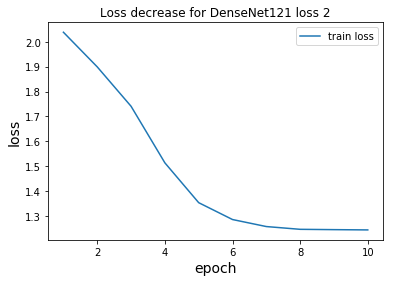

In [103]:
plt.plot(epoch,train_loss)
plt.legend(["train loss"])
plt.xlabel("epoch",fontsize = 14)
plt.ylabel("loss",fontsize = 14)
plt.title("Loss decrease for DenseNet121 loss 1")
plt.savefig('./train loss for densenet121 loss 1',format='eps', dpi=1000)
plt.show()

/Users/lijiawei/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


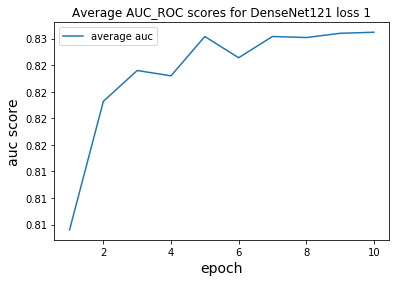

In [112]:
plt.plot(epoch,auc_avg)
plt.legend(["average auc"])
plt.xlabel("epoch",fontsize = 14)
plt.ylabel("auc score",fontsize = 14)
plt.title("Average AUC_ROC scores for DenseNet121 loss 1")

ax = plt.axes()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.savefig('./auc for densenet121 loss 1',format='eps', dpi=10000)
plt.show()

In [54]:
print(train_loss)

[0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14]
